In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datasets import Dataset, load_dataset
import tensorflow as tf
import keras


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-04-18 14:04:00.389593: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 14:04:00.389693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 14:04:00.487273: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/emotions-dataset-for-nlp/val.txt
/kaggle/input/emotions-dataset-for-nlp/test.txt
/kaggle/input/emotions-dataset-for-nlp/train.txt


# **Load the Data for Visualization**

In [ ]:
train_ds = pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/train.txt", delimiter=";", names=["text", "label"])

val_ds = pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/val.txt", delimiter=";", names=["text", "label"])

test_ds = pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/test.txt", delimiter=";", names=["text", "label"])

In [ ]:
train_ds

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
val_ds

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [ ]:
test_ds

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


# **Visualize Data**

/tmp/ipykernel_24/1803753486.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


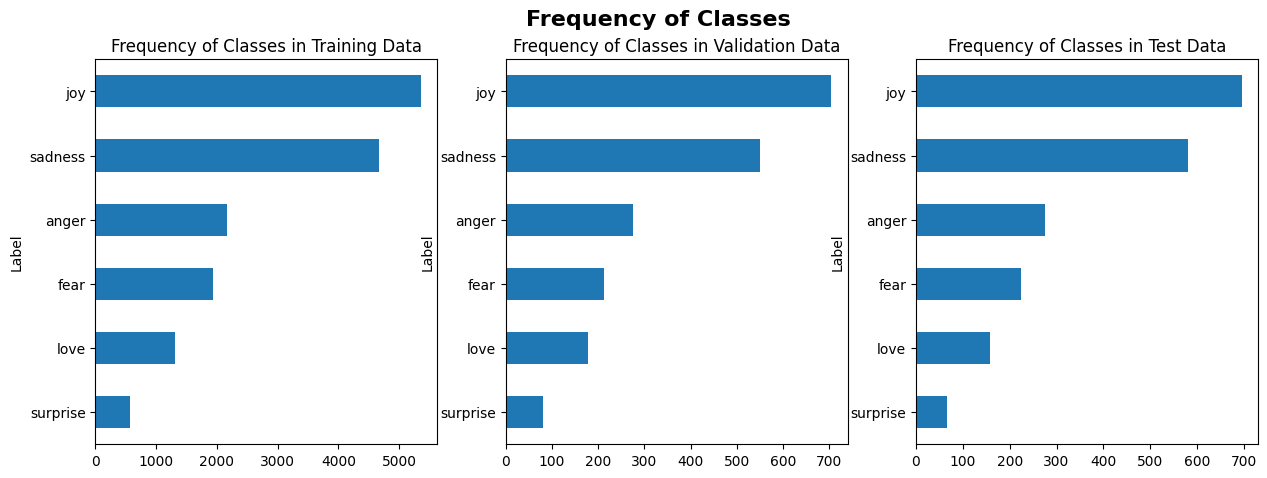

In [ ]:
plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
train_ds["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes in Training Data")
plt.ylabel("Label")

plt.subplot(1,3,2)
val_ds["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes in Validation Data")
plt.ylabel("Label")

plt.subplot(1,3,3)
test_ds["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes in Test Data")
plt.ylabel("Label")

plt.suptitle("Frequency of Classes", fontsize=16, fontweight='bold')
plt.show()


In [ ]:
# Concat Train and Val Set to get a better overview of whole Training Set

emotions = pd.concat([train_ds, val_ds], axis=0)

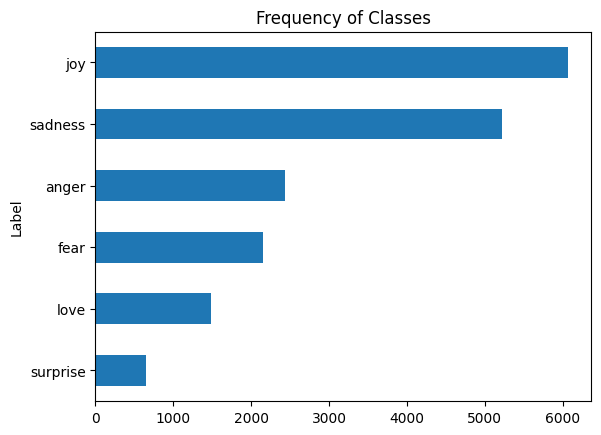

In [ ]:
emotions["label"].value_counts(ascending=True).plot.barh()
plt.ylabel("Label")
plt.title("Frequency of Classes")
plt.show()

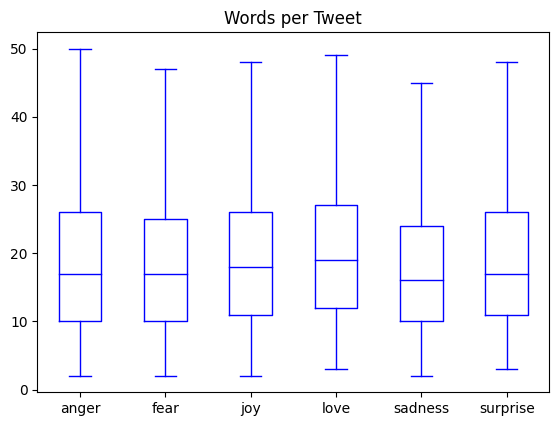

In [ ]:
emotions["Words per Tweet"] = emotions["text"].str.split().apply(len)
emotions.boxplot("Words per Tweet", by="label", grid=False, showfliers=False, color="blue")
plt.suptitle("")
plt.xlabel("")
plt.show()

Loading Datasets again but this time as a Dict

In [ ]:
emotions_train = load_dataset("csv", data_files="/kaggle/input/emotions-dataset-for-nlp/train.txt", delimiter=";", names=["text", "label"])
emotions_val = load_dataset("csv", data_files="/kaggle/input/emotions-dataset-for-nlp/val.txt", delimiter=";", names=["text", "label"])
emotions_test = load_dataset("csv", data_files="/kaggle/input/emotions-dataset-for-nlp/test.txt", delimiter=";", names=["text", "label"])

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
emotions_train

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

In [ ]:
emotions_val

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
emotions_test

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

# **Import pre-trained Model DistilBERT**

In [ ]:
from transformers import AutoTokenizer

model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

# **Tokenization**

In [ ]:
def tokenize(data):
    #train_texts = data["text"].tolist()
    return tokenizer(data["text"], padding=True, truncation=True, return_tensors="tf")

In [ ]:
emotions_train_encoded = emotions_train.map(tokenize, batched = True, batch_size = None) # token encodings train set

emotions_val_encoded = emotions_val.map(tokenize, batched = True, batch_size = None) # token encodings validation set

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions_train_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
})

In [ ]:
emotions_val_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

# **Train Model on Twitter Dataset**

**1. Feature Extraction**

In [ ]:
from transformers import TFAutoModel

bert_model = TFAutoModel.from_pretrained(model)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
# Get hidden States for Feature Extraction

def extract_hidden_states(batch):
    #inputs = {key: tf.convert_to_tensor(batch[key]) for key in batch.keys() if key != "label"}
    inputs = tokenizer(batch["text"], padding=True,
                       truncation=True, return_tensors='tf')
    outputs = bert_model(inputs)
    hidden_states = outputs.last_hidden_state[:, 0].numpy()
    return {"hidden_states": hidden_states}

train_hidden_states = emotions_train_encoded.map(extract_hidden_states, batched=True)
val_hidden_states = emotions_val_encoded.map(extract_hidden_states, batched=True)

/opt/conda/lib/python3.10/site-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
train_hidden_states

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_states'],
        num_rows: 16000
    })
})

In [ ]:
val_hidden_states

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_states'],
        num_rows: 2000
    })
})

In [ ]:
X_train = np.array(train_hidden_states["train"]["hidden_states"])
X_val = np.array(val_hidden_states["train"]["hidden_states"])

In [ ]:
y_train = np.array(train_hidden_states["train"]["label"])
y_val = np.array(val_hidden_states["train"]["label"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)

In [ ]:
# Visualize the Training Set in a 2D

from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)

mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.401956,6.398651,4
1,-2.928470,6.046028,4
2,5.507990,2.754867,0
3,-2.342625,4.247516,3
4,-3.267081,4.382162,0


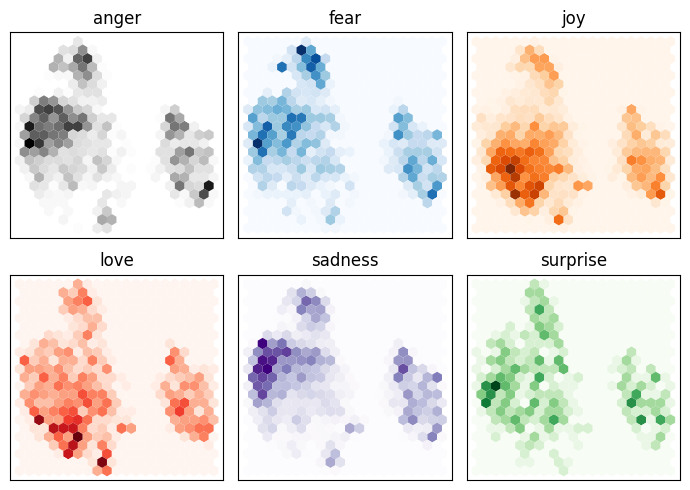

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = np.unique(emotions_train["train"]["label"])


for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label=={i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                  gridsize=20, linewidth=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

Using some base Models

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

xgb_clf.score(X_val, y_val)

0.5735

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_clf = LogisticRegression(max_iter=3000)

log_clf.fit(X_train, y_train)

log_clf.score(X_val, y_val)

0.6335

****Evaluation****

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
model1 = "XGBoost Classifier"
model2 = "Logistic Regression"

def confusion_matrix_plot(y_pred, y_true, labels, clf):
    cm = confusion_matrix(y_true, y_pred, normalize="true")
    fig, ax = plt.subplots(figsize=(6,6))
    confm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
    confm.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title(f"Normalized confusion matrix {clf}")
    plt.show()

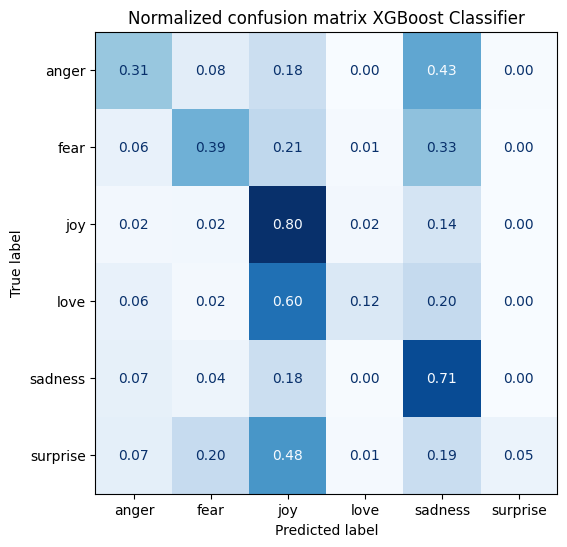

In [ ]:
# XGB Classifier Confusion Matrix

y_pred_xgb = xgb_clf.predict(X_val)
confusion_matrix_plot(y_pred_xgb, y_val, labels, model1)

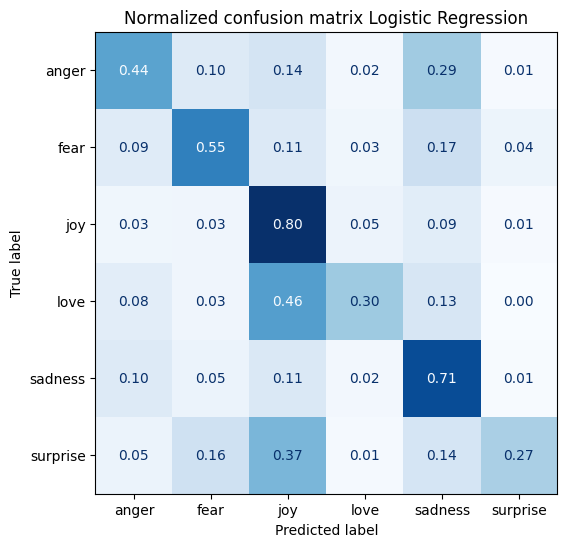

In [ ]:
# Logistic Regression Confusion Matrix

y_pred_log = log_clf.predict(X_val)
confusion_matrix_plot(y_pred_log, y_val, labels, model2)

**2. Fine-Tuning**

In [ ]:
from transformers import TFAutoModelForSequenceClassification

In [ ]:
num_labels = 6
batch_size = 64
tf_model = TFAutoModelForSequenceClassification.from_pretrained(model, num_labels=num_labels)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
# Label Encoding for TF Model
labels_train = emotions_train_encoded["train"]["label"]
labels_val = emotions_val_encoded["train"]["label"]

label_encoded_train = le.fit_transform(labels_train)
emotions_train_encoded["train"] = emotions_train_encoded["train"].add_column("encoded_label", label_encoded_train)

label_encoded_val = le.fit_transform(labels_val)
emotions_val_encoded["train"] = emotions_val_encoded["train"].add_column("encoded_label", label_encoded_val)

In [ ]:
tokenizer_columns = tokenizer.model_input_names

tf_train =  emotions_train_encoded["train"].to_tf_dataset(columns=tokenizer_columns, label_cols=["encoded_label"],
                                                          shuffle=True,
                                                          batch_size=batch_size)

tf_val = emotions_val_encoded["train"].to_tf_dataset(columns=tokenizer_columns, label_cols=["encoded_label"],
                                                     shuffle=False,
                                                     batch_size=batch_size)

/opt/conda/lib/python3.10/site-packages/datasets/arrow_dataset.py:401: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
tf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [ ]:
tf_model.fit(tf_train, validation_data=tf_val, epochs=3)

Epoch 1/3
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


I0000 00:00:1713449531.905026      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 [==============================] - 205s 575ms/step - loss: 0.5107 - sparse_categorical_accuracy: 0.8266 - val_loss: 0.1804 - val_sparse_categorical_accuracy: 0.9310
Epoch 2/3
250/250 [==============================] - 137s 547ms/step - loss: 0.1502 - sparse_categorical_accuracy: 0.9356 - val_loss: 0.1607 - val_sparse_categorical_accuracy: 0.9355
Epoch 3/3
250/250 [==============================] - 137s 546ms/step - loss: 0.1013 - sparse_categorical_accuracy: 0.9503 - val_loss: 0.1348 - val_sparse_categorical_accuracy: 0.9330


In [ ]:
y_pred_tf = tf_model.predict(tf_val)

32/32 [==============================] - 9s 143ms/step


In [ ]:
# Predictet Labels from Model

logits = y_pred_tf.logits
y_pred = np.argmax(logits, axis=1)

print("Predicted Labels:", y_pred)

Predicted Labels: [4 4 3 ... 2 2 2]


In [ ]:
# Get true Labels

def extract_labels(features, labels):
    return labels

y_true = tf_val.map(extract_labels)

y_true = tf.concat(list(y_true.as_numpy_iterator()), axis=0)
print(y_true)

tf.Tensor([4 4 3 ... 2 2 2], shape=(2000,), dtype=int64)


**Evaluation**

In [ ]:
# Metrics which we use to evaluate the model

from sklearn.metrics import accuracy_score, f1_score

def evaluate_model(y_true, y_prediction):
    f1 = f1_score(y_true, y_pred, average="weighted")
    acc = accuracy_score(y_true, y_pred)
    return {"accuarcy": acc, "f1": f1}

In [ ]:
evaluate_model(y_true, y_pred)

{'accuarcy': 0.933, 'f1': 0.9330436791433421}

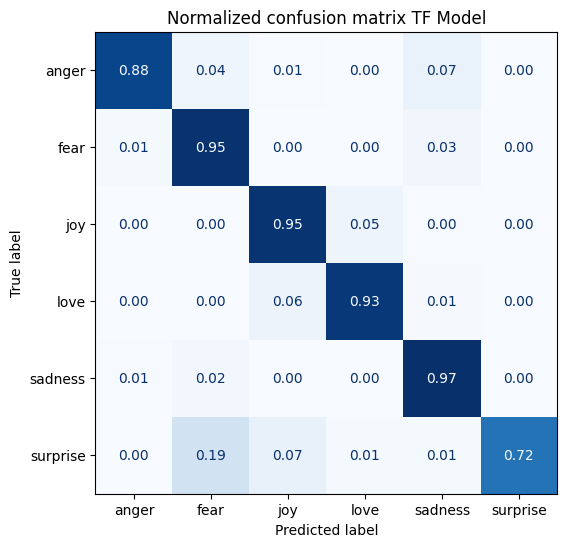

In [ ]:
# Confusion Matrix

confusion_matrix_plot(y_pred, y_true, labels, "TF Model")


In [ ]:
# Display some examples

for i in range(20):
    predicted_label_index = y_pred[i]
    predicted_label = emotions_train["train"]["label"][predicted_label_index]
    true_label_index = int(y_true[i])
    true_label = le.inverse_transform([true_label_index])

    print(f"Predicted Label: {predicted_label}\nTrue Label: {true_label}\nText: {emotions_val_encoded['train']['text'][i]}\n\n")


Predicted Label: anger
True Label: ['sadness']
Text: im feeling quite sad and sorry for myself but ill snap out of it soon


Predicted Label: anger
True Label: ['sadness']
Text: i feel like i am still looking at a blank canvas blank pieces of paper


Predicted Label: love
True Label: ['love']
Text: i feel like a faithful servant


Predicted Label: sadness
True Label: ['anger']
Text: i am just feeling cranky and blue


Predicted Label: anger
True Label: ['joy']
Text: i can have for a treat or if i am feeling festive


Predicted Label: anger
True Label: ['joy']
Text: i start to feel more appreciative of what god has done for me


Predicted Label: anger
True Label: ['joy']
Text: i am feeling more confident that we will be able to take care of this baby


Predicted Label: anger
True Label: ['joy']
Text: i feel incredibly lucky just to be able to talk to her


Predicted Label: anger
True Label: ['joy']
Text: i feel less keen about the army every day


Predicted Label: anger
True Label: ['sa